In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
df = pd.read_csv(r'C19 newCases.csv')

      id       date  new_cases_malaysia
0      1  24-1-2020                   0
1      2  25-1-2020                   4
2      3  26-1-2020                   0
3      4  27-1-2020                   0
4      5  28-1-2020                   3
..   ...        ...                 ...
214  215  25-8-2020                  11
215  216  26-8-2020                   6
216  217  27-8-2020                   5
217  218  28-8-2020                  10
218  219  29-8-2020                  11

[219 rows x 3 columns]


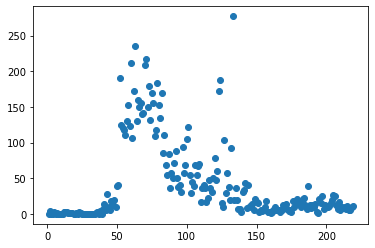

In [2]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna()
print(df)
plt.scatter(df['id'], df['new_cases_malaysia'])

In [3]:
# Function to calculate the Gaussian with constants a, b, and c
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2))) #original : return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

In [4]:

# Fit the dummy power-law data
pars, cov = curve_fit(f=gaussian, xdata=df['id'], ydata=df['new_cases_malaysia'], p0= [5, -1, 1], bounds=(-np.inf, np.inf)) 
# original : pars, cov = curve_fit(f=gaussian, xdata=df['id'], ydata=df['new_cases_malaysia'], p0=[5, -1, 1], bounds=(-np.inf, np.inf))


# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))

# Calculate the residuals
res = df['new_cases_malaysia'] - gaussian(df['id'], *pars)

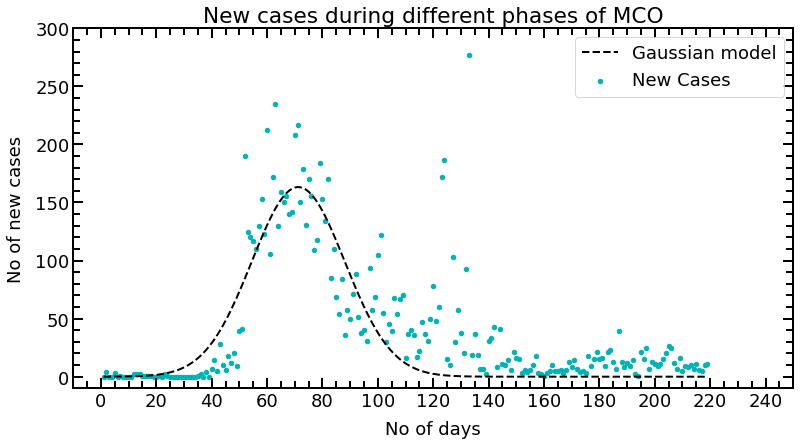

In [6]:
# Edit the font, font size, and axes width
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(10, 5))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

# Plot the noisy exponential data
ax.scatter(df['id'], df['new_cases_malaysia'], s=20, color='#00b3b3', label='New Cases')
ax.plot(df['id'], gaussian(df['id'], *pars), linewidth=2, linestyle='--', color='black', label = 'Gaussian model')

# Add the x and y-axis labels
ax.set_xlabel('No of days', labelpad=10)
ax.set_ylabel('No of new cases', labelpad=10)
ax.set_title('New cases during different phases of MCO')

# Set the axis limits
ax.set_xlim(-10, 250)
ax.set_ylim(-10, 300)

#plt.savefig('gauss.png', bbox_inches='tight', transparent = True)
#plt.savefig('dummy_dataset_gaussian_fit.png', dpi=100, bbox_inches='tight')
plt.legend(loc='upper right')
plt.show()
